<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-07-03 23:52:29--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  29.6MB/s    in 1.2s    

2024-07-03 23:52:31 (29.6 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [11]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [122]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


In [173]:
Query = """
        Select * From DevType
        
        """
df = pd.read_sql_query(Query,conn)
df
df.groupby('DevType')['Respondent'].count().sort_values(ascending=False)

DevType
Developer, full-stack                            6928
Developer, back-end                              6290
Developer, front-end                             3920
Developer, desktop or enterprise applications    2575
Developer, mobile                                1959
DevOps specialist                                1639
Database administrator                           1413
System administrator                             1202
Designer                                          988
Developer, QA or test                             911
Developer, embedded applications or devices       854
Engineer, data                                    832
Data scientist or machine learning specialist     803
Data or business analyst                          802
Student                                           766
Academic researcher                               556
Educator                                          514
Product manager                                   480
Developer, game or g

## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [7]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


Text(0.5, 0, 'Converted Comp')

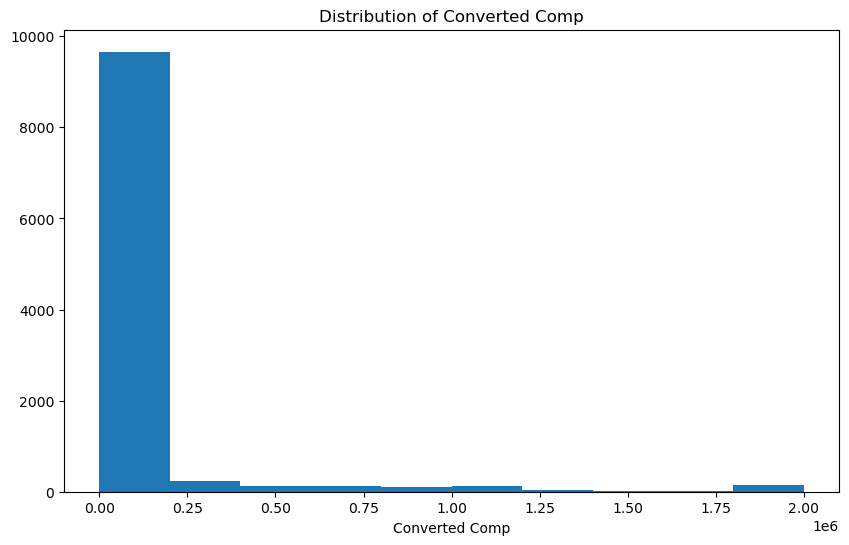

In [108]:
# your code goes here
Query = """
        Select * From master
        """
df = pd.read_sql_query(Query,conn)
fig = plt.figure(figsize=(10,6))
plt.hist(df['ConvertedComp'])
plt.title("Distribution of Converted Comp")
plt.xlabel('Converted Comp')

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:xlabel='Age'>

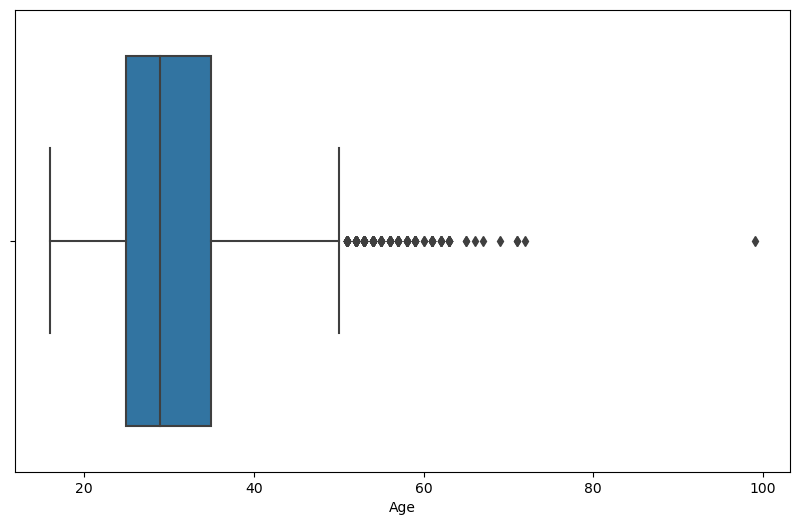

In [20]:
# your code goes here
fig = plt.figure(figsize=(10,6))
sns.boxplot(df['Age'])


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


Text(0, 0.5, 'WorkWeekHrs')

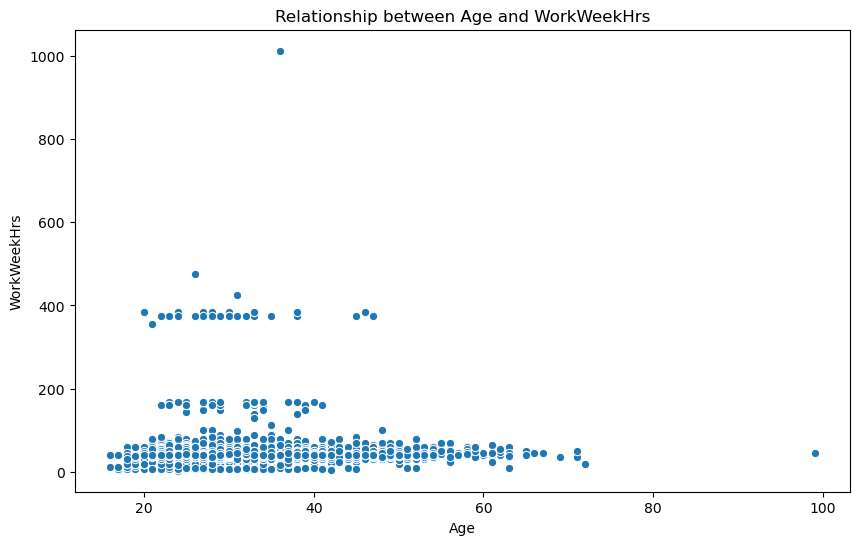

In [110]:
# your code goes here
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Age'], y=df['WorkWeekHrs'])
plt.title('Relationship between Age and WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')


In [112]:
df[['WorkWeekHrs','Age']].corr()

,WorkWeekHrs,Age
WorkWeekHrs,1.000000,0.036517
Age,0.036517,1.000000


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


Text(0, 0.5, 'WorkWeekHrs')

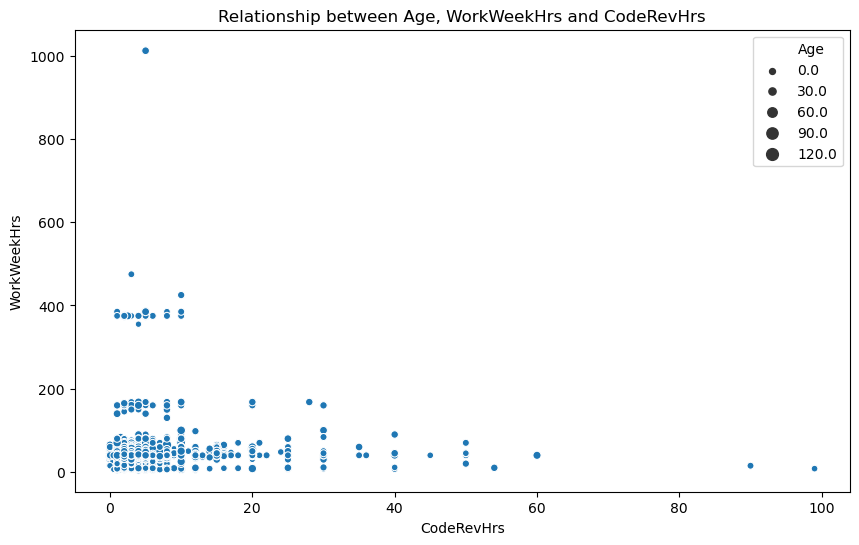

In [27]:
# your code goes here
fig = plt.figure(figsize=(10,6))
sns.scatterplot(x=df['CodeRevHrs'], y=df['WorkWeekHrs'], size=df['Age'])
plt.title('Relationship between Age, WorkWeekHrs and CodeRevHrs')
plt.xlabel('CodeRevHrs')
plt.ylabel('WorkWeekHrs')


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [44]:
import plotly.express as px 
import plotly.graph_objects as go
df

,Respondent,DatabaseDesireNextYear
0,4,MySQL
1,4,SQLite
2,9,PostgreSQL
3,9,Redis
4,9,SQLite
...,...,...
29570,25141,Elasticsearch
29571,25141,MongoDB
29572,25141,Microsoft SQL Server
29573,25141,Redis


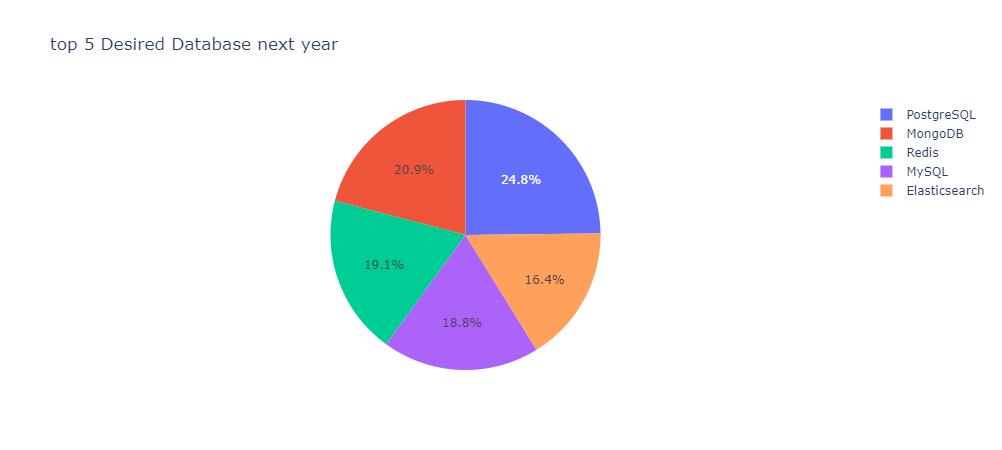

In [135]:
# your code goes here
Query = """
        Select * From DatabaseDesireNextYear
        """
df = pd.read_sql_query(Query,conn)
gp_df = df.groupby('DatabaseDesireNextYear')['Respondent'].count().sort_values(ascending=False)
top_5 = gp_df.head(5)
top_5
px.pie(top_5, names= top_5.index, values=top_5.values,title='top 5 Desired Database next year')


In [121]:
Query = """
        Select * From MiscTechWorkedWith
        """
df = pd.read_sql_query(Query,conn)
df.groupby('MiscTechWorkedWith')['Respondent'].sum().sort_values(ascending=False)


MiscTechWorkedWith
Node.js          58281196
.NET             45691297
.NET Core        30822464
Pandas           12803886
React Native     12410449
Ansible          11926867
TensorFlow        9967577
Unity 3D          9161412
Cordova           7876418
Xamarin           7406248
Apache Spark      6609882
Hadoop            5225816
Other(s):         5064751
Puppet            3574707
Flutter           3454930
Chef              3254158
Torch/PyTorch     2725137
Unreal Engine     2430152
CryEngine          243012
Name: Respondent, dtype: int64

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



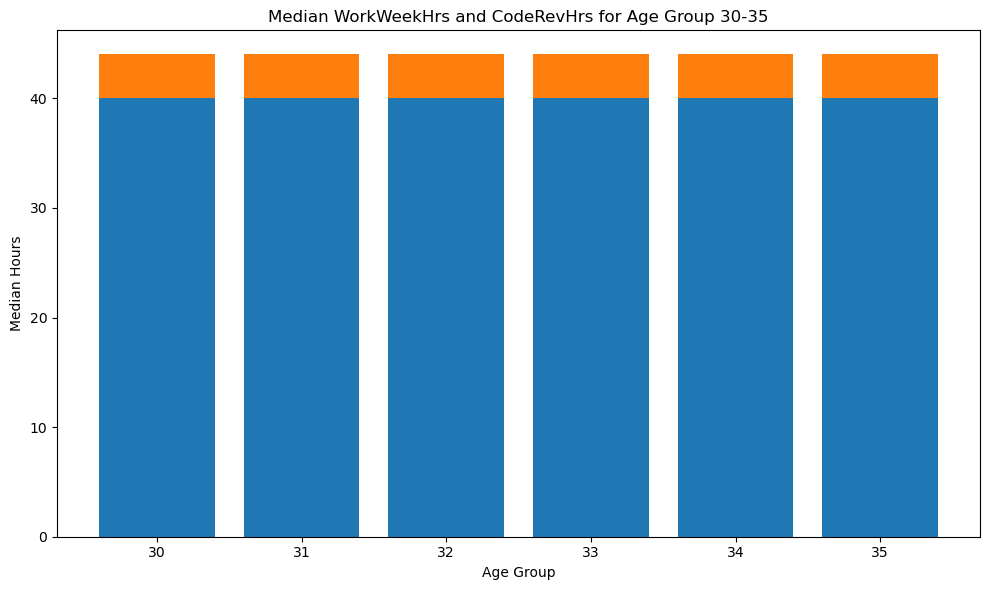

In [79]:
# your code goes here
Query = """
        Select WorkWeekHrs, CodeRevHrs, Age From Master
        Where Age between 30 And 35
        """
df2 = pd.read_sql_query(Query,conn)
gp = df2.groupby('Age')['WorkWeekHrs','CodeRevHrs'].median()
fig = plt.figure(figsize=(10,6))
plt.bar(gp.index, gp['WorkWeekHrs'],label= gp['WorkWeekHrs'])
plt.bar(gp.index, gp['CodeRevHrs'],bottom= gp['WorkWeekHrs'], label= gp['CodeRevHrs'])
plt.xlabel('Age Group')
plt.ylabel('Median Hours')
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30-35')

plt.tight_layout()
plt.show()



## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


Text(0.5, 1.0, 'Median of ConvertedComp VS Age')

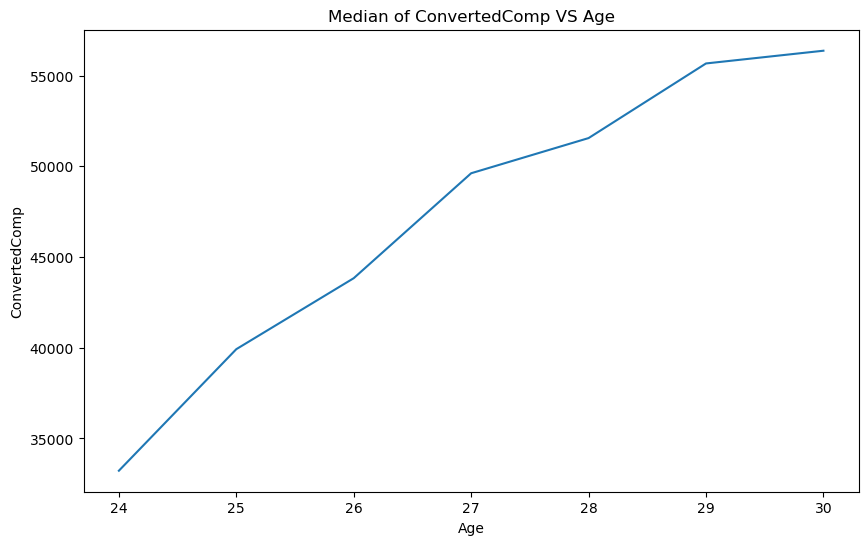

In [174]:
Query = """
        Select ConvertedComp, Age From Master
        Where Age between 24 And 30
        """
df3 = pd.read_sql_query(Query,conn)
gp = df3.groupby('Age')['ConvertedComp'].median()
fig = plt.figure(figsize=(10,6))
gp.plot()
plt.ylabel('ConvertedComp')
plt.title('Median of ConvertedComp VS Age')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


<AxesSubplot:ylabel='MainBranch'>

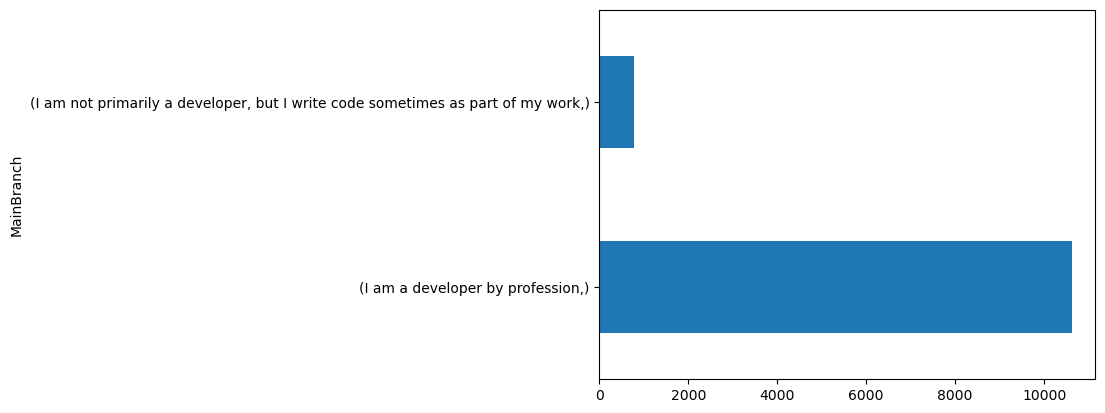

In [106]:
# your code goes here
Query = """
        Select MainBranch From Master
        """
df4 = pd.read_sql_query(Query,conn)
gp = df4.value_counts()
gp.plot(kind='barh')



Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
